DATA CLEANING STEPS

In [1]:
import pandas as pd
cars_data=pd.read_csv('cars.csv')

In [2]:
display(cars_data.head())

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
# Print all column names
print(cars_data.columns)

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')


In [4]:
cars_data = cars_data.rename(columns=lambda column_name: column_name.strip())

In [5]:
print(cars_data.columns)

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')


In [6]:
print(cars_data['brand'].unique())

[' US.' ' Europe.' ' Japan.']


In [7]:
cars_data['brand'] = cars_data['brand'].str.replace('.', '', regex=False)

In [8]:
print(cars_data['brand'].unique())

[' US' ' Europe' ' Japan']


In [9]:
cars_data['brand'] = cars_data['brand'].str.strip()

In [10]:
print(cars_data['brand'].unique())

['US' 'Europe' 'Japan']


In [11]:
cars_data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [12]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


SETTING UP THE MODEL

In [15]:
numerical_feature_columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']

In [16]:
for col in numerical_feature_columns:
    # Convert column to numeric. 'errors=coerce' will turn non-convertible values into NaN.
    cars_data[col] = pd.to_numeric(cars_data[col], errors='coerce')


In [17]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [18]:
cars_data.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [19]:
cars_data_cleaned = cars_data.dropna()

In [20]:
cars_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    float64
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


In [21]:
cars_data_filtered = cars_data_cleaned[cars_data_cleaned['brand'].isin(['US', 'Europe', 'Japan'])]

SETTING UP THE MODEL (DEPTH =1)

In [22]:
#train and test data set

X= cars_data_filtered[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year']] #features

y= (cars_data_filtered['brand']=='US') #0 if not US, 1 if US



In [23]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(max_depth=1).fit(X,y)

C:\Users\ashish.sharma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Text(0.5, 0.75, 'X[2] <= 134.5\ngini = 0.473\nsamples = 256\nvalue = [98, 158]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 110\nvalue = [88, 22]'),
 Text(0.75, 0.25, 'gini = 0.128\nsamples = 146\nvalue = [10, 136]')]

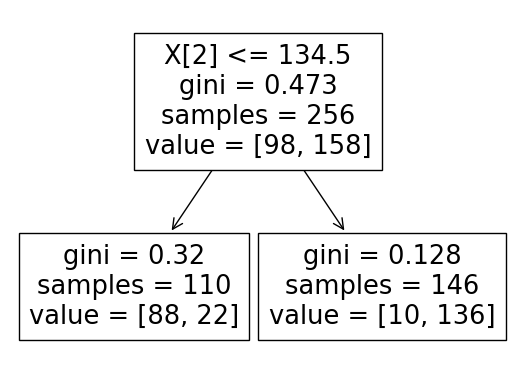

In [24]:
from sklearn.tree import plot_tree
plot_tree(tree)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)
tree= DecisionTreeClassifier(max_depth=1).fit(X,y)

accuracy_score(y_train, tree.predict(X_train))


0.8578431372549019

In [26]:
accuracy_score(y_test, tree.predict(X_test))

0.9423076923076923

SETTING UP MODEL FOR DEPTH=2

In [27]:
tree2= DecisionTreeClassifier(max_depth=2).fit(X,y)

[Text(0.5, 0.8333333333333334, 'X[2] <= 134.5\ngini = 0.473\nsamples = 256\nvalue = [98, 158]'),
 Text(0.25, 0.5, 'X[6] <= 1982.5\ngini = 0.32\nsamples = 110\nvalue = [88, 22]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.267\nsamples = 101\nvalue = [85, 16]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.75, 0.5, 'X[2] <= 190.5\ngini = 0.128\nsamples = 146\nvalue = [10, 136]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 116\nvalue = [0, 116]')]

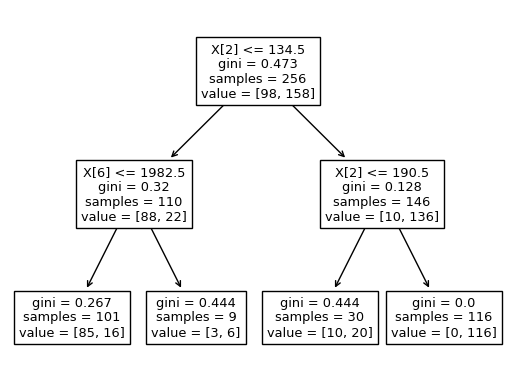

In [28]:
from sklearn.tree import plot_tree
plot_tree(tree2)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X,y,test_size=0.2, random_state=42)
tree2= DecisionTreeClassifier(max_depth=2).fit(X,y)

accuracy_score(y_train_2, tree2.predict(X_train_2))

0.8725490196078431

In [30]:
accuracy_score(y_test_2, tree2.predict(X_test_2))

0.9423076923076923